<a href="https://colab.research.google.com/github/ashutosh3060/ml-algorithms/blob/master/logistic_regression_indepth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents:

## Libraries

In [37]:
## Python Basic
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# warning
import warnings
warnings.filterwarnings('ignore')

### Import Data and Basic Exploration

In [2]:
# Import Data

df_drug = pd.read_csv("/content/drug200.csv")

In [6]:
print(df_drug.shape)
df_drug.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [7]:
# Unique target values
print(df_drug.Drug.nunique())
df_drug.Drug.unique()

5


array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

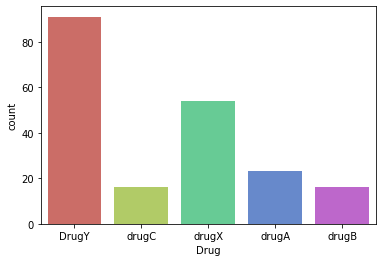

In [8]:
sns.countplot(x="Drug", data=df_drug, palette='hls')

### EDA

###  New Feature Creation

#### Create an Id for each record (Assumption: Each record is for a patient)

In [21]:
## Rename columns to Lower case
df_drug.columns= df_drug.columns.str.lower()
df_drug.head(2)

,patient_id,age,sex,bp,cholesterol,na_to_k,drug
0,1,23,F,HIGH,HIGH,25.355,DrugY
1,2,47,M,LOW,HIGH,13.093,drugC


In [25]:
# Create 'patient_id' column for unique identifier for each patient.

df_drug.drop(columns=["patient_id"], axis=1, inplace=True)
idx = 0
new_col = range(1, len(df_drug)+1)
df_drug.insert(loc=idx, column="patient_id", value=new_col)

# Create a column for Binary target
'''
If drug=='drugY' then 1 else 0
'''
df_drug["drug_y"] = np.where(df_drug["drug"].str.lower()=="drugy", 1, 0)
df_drug.head()

,patient_id,age,sex,bp,cholesterol,na_to_k,drug,drug_y
0,1,23,F,HIGH,HIGH,25.355,DrugY,1
1,2,47,M,LOW,HIGH,13.093,drugC,0
2,3,47,M,LOW,HIGH,10.114,drugC,0
3,4,28,F,NORMAL,HIGH,7.798,drugX,0
4,5,61,F,LOW,HIGH,18.043,DrugY,1


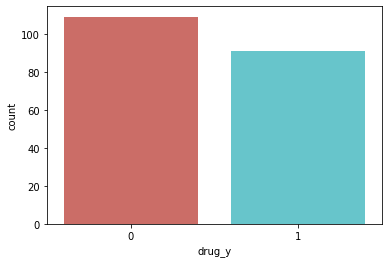

In [28]:
sns.countplot(x="drug_y", data=df_drug, palette='hls')

#### Create Dummy Categorical Variables

In [44]:
cat_vars=['sex','bp','cholesterol']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_drug[var], prefix=var)
    data1=df_drug.join(cat_list)
    data = data1
cat_vars=['sex','bp','cholesterol']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_keep

['patient_id',
 'age',
 'na_to_k',
 'drug',
 'drug_y',
 'cholesterol_HIGH',
 'cholesterol_NORMAL']

## Data Preparation for Moldel Build

In [32]:
cols = ["age", "sex", "bp", "cholesterol", "na_to_k"] 
X = df_drug[cols]
y = df_drug['drug_y']

In [38]:
# Training and Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=12)

In [45]:
print(f'test for print')

test for print


In [ ]:
print(f'test for print')

### Logistic Regression Model Build

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

ValueError: ignored

In [18]:
logreg = LogisticRegression()

LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the 'multi_class' option is set to 'ovr', and uses the cross-entropy loss if the 'multi_class' option is set to 'multinomial'. (Currently the 'multinomial' option is supported only by the 'lbfgs', 'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the 'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note that regularization is applied by default**. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).

The 'newton-cg', 'sag', and 'lbfgs' solvers support only L2 regularization with primal formulation, or no regularization. The 'liblinear' solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the 'saga' solver.

Read more in the :ref:User Guide <logistic_regression>.

Parameters
penalty : {'l1', 'l2', 'elasticnet', 'none'}, default='l2'

    Used to specify the norm used in the penalization. The 'newton-cg',  
    'sag' and 'lbfgs' solvers support only l2 penalties. 'elasticnet' is  
    only supported by the 'saga' solver. If 'none' (not supported by the  
    liblinear solver), no regularization is applied.  

       l1 penalty with SAGA solver (allowing 'multinomial' + L1)  
dual : bool, default=False

    Dual or primal formulation. Dual formulation is only implemented for  
    l2 penalty with liblinear solver. Prefer dual=False when  
    n_samples   n_features.  
tol : float, default=1e-4

    Tolerance for stopping criteria.  
C : float, default=1.0

    Inverse of regularization strength; must be a positive float.  
    Like in support vector machines, smaller values specify stronger  
    regularization.  
fit_intercept : bool, default=True

    Specifies if a constant (a.k.a. bias or intercept) should be  
    added to the decision function.  
intercept_scaling : float, default=1

    Useful only when the solver 'liblinear' is used  
    and self.fit_intercept is set to True. In this case, x becomes  
    [x, self.intercept_scaling],  
    i.e. a "synthetic" feature with constant value equal to  
    intercept_scaling is appended to the instance vector.  
    The intercept becomes `intercept_scaling * synthetic_feature_weight`.  

    Note! the synthetic feature weight is subject to l1/l2 regularization  
    as all other features.  
    To lessen the effect of regularization on synthetic feature weight  
    (and therefore on the intercept) intercept_scaling has to be increased.  
class_weight : dict or 'balanced', default=None

    Weights associated with classes in the form `{class_label: weight}`.  
    If not given, all classes are supposed to have weight one.  

    The "balanced" mode uses the values of y to automatically adjust  
    weights inversely proportional to class frequencies in the input data  
    as `n_samples / (n_classes * np.bincount(y))`.  

    Note that these weights will be multiplied with sample_weight (passed  
    through the fit method) if sample_weight is specified.  

       *class_weight='balanced'*  
random_state : int, RandomState instance, default=None

    The seed of the pseudo random number generator to use when shuffling  
    the data.  If int, random_state is the seed used by the random number  
    generator; If RandomState instance, random_state is the random number  
    generator; If None, the random number generator is the RandomState  
    instance used by `np.random`. Used when `solver` == 'sag' or  
    'liblinear'.  
solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'

    Algorithm to use in the optimization problem.  

    - For small datasets, 'liblinear' is a good choice, whereas 'sag' and  
      'saga' are faster for large ones.  
    - For multiclass problems, only 'newton-cg', 'sag', 'saga' and 'lbfgs'  
      handle multinomial loss; 'liblinear' is limited to one-versus-rest  
      schemes.  
    - 'newton-cg', 'lbfgs', 'sag' and 'saga' handle L2 or no penalty  
    - 'liblinear' and 'saga' also handle L1 penalty  
    - 'saga' also supports 'elasticnet' penalty  
    - 'liblinear' does not support setting `penalty='none'`  

    Note that 'sag' and 'saga' fast convergence is only guaranteed on  
    features with approximately the same scale. You can  
    preprocess the data with a scaler from sklearn.preprocessing.  

       Stochastic Average Gradient descent solver.  
       SAGA solver.  
        The default solver changed from 'liblinear' to 'lbfgs' in 0.22.  
max_iter : int, default=100

    Maximum number of iterations taken for the solvers to converge.  
multi_class : {'auto', 'ovr', 'multinomial'}, default='auto'

    If the option chosen is 'ovr', then a binary problem is fit for each  
    label. For 'multinomial' the loss minimised is the multinomial loss fit  
    across the entire probability distribution, *even when the data is  
    binary*. 'multinomial' is unavailable when solver='liblinear'.  
    'auto' selects 'ovr' if the data is binary, or if solver='liblinear',  
    and otherwise selects 'multinomial'.  

       Stochastic Average Gradient descent solver for 'multinomial' case.  
        Default changed from 'ovr' to 'auto' in 0.22.  
verbose : int, default=0

    For the liblinear and lbfgs solvers set verbose to any positive  
    number for verbosity.  
warm_start : bool, default=False

    When set to True, reuse the solution of the previous call to fit as  
    initialization, otherwise, just erase the previous solution.  
    Useless for liblinear solver. See :term:`the Glossary  warm_start `.  

       *warm_start* to support *lbfgs*, *newton-cg*, *sag*, *saga* solvers.  
n_jobs : int, default=None

    Number of CPU cores used when parallelizing over classes if  
    multi_class='ovr'". This parameter is ignored when the `solver` is  
    set to 'liblinear' regardless of whether 'multi_class' is specified or  
    not. `None` means 1 unless in a :obj:`joblib.parallel_backend`  
    context. `-1` means using all processors.  
    See :term:`Glossary  n_jobs ` for more details.  
l1_ratio : float, default=None

    The Elastic-Net mixing parameter, with `0  = l1_ratio  = 1`. Only  
    used if `penalty='elasticnet'`. Setting `l1_ratio=0` is equivalent  
    to using `penalty='l2'`, while setting `l1_ratio=1` is equivalent  
    to using `penalty='l1'`. For `0   l1_ratio  1`, the penalty is a  
    combination of L1 and L2.  
Attributes
classes_ : ndarray of shape (n_classes, )

    A list of class labels known to the classifier.  
coef_ : ndarray of shape (1, n_features) or (n_classes, n_features)

    Coefficient of the features in the decision function.  

    `coef_` is of shape (1, n_features) when the given problem is binary.  
    In particular, when `multi_class='multinomial'`, `coef_` corresponds  
    to outcome 1 (True) and `-coef_` corresponds to outcome 0 (False).  
intercept_ : ndarray of shape (1,) or (n_classes,)

    Intercept (a.k.a. bias) added to the decision function.  

    If `fit_intercept` is set to False, the intercept is set to zero.  
    `intercept_` is of shape (1,) when the given problem is binary.  
    In particular, when `multi_class='multinomial'`, `intercept_`  
    corresponds to outcome 1 (True) and `-intercept_` corresponds to  
    outcome 0 (False).  
n_iter_ : ndarray of shape (n_classes,) or (1, )

    Actual number of iterations for all classes. If binary or multinomial,  
    it returns only 1 element. For liblinear solver, only the maximum  
    number of iteration across all classes is given.  


        In SciPy  = 1.0.0 the number of lbfgs iterations may exceed  
        `max_iter`. `n_iter_` will now report at most `max_iter`.  
See Also
SGDClassifier : Incrementally trained logistic regression (when given

    the parameter `loss="log"`).  
LogisticRegressionCV : Logistic regression with built-in cross validation.

Notes
The underlying C implementation uses a random number generator to select features when fitting the model. It is thus not uncommon, to have slightly different results for the same input data. If that happens, try with a smaller tol parameter.

Predict output may not match that of standalone liblinear in certain cases. See :ref:differences from liblinear <liblinear_differences> in the narrative documentation.

References
L-BFGS-B -- Software for Large-scale Bound-constrained Optimization

    Ciyou Zhu, Richard Byrd, Jorge Nocedal and Jose Luis Morales.  
    http://users.iems.northwestern.edu/~nocedal/lbfgsb.html  
LIBLINEAR -- A Library for Large Linear Classification

    https://www.csie.ntu.edu.tw/~cjlin/liblinear/  
SAG -- Mark Schmidt, Nicolas Le Roux, and Francis Bach

    Minimizing Finite Sums with the Stochastic Average Gradient  
    https://hal.inria.fr/hal-00860051/document  
SAGA -- Defazio, A., Bach F. & Lacoste-Julien S. (2014).

    SAGA: A Fast Incremental Gradient Method With Support  
    for Non-Strongly Convex Composite Objectives  
    https://arxiv.org/abs/1407.0202  
Hsiang-Fu Yu, Fang-Lan Huang, Chih-Jen Lin (2011). Dual coordinate descent

    methods for logistic regression and maximum entropy models.  
    Machine Learning 85(1-2):41-75.  
    https://www.csie.ntu.edu.tw/~cjlin/papers/maxent_dual.pdf  
Examples
from sklearn.datasets import load_iris from sklearn.linear_model import LogisticRegression X, y = load_iris(return_X_y=True) clf = LogisticRegression(random_state=0).fit(X, y) clf.predict(X[:2, :]) array([0, 0]) clf.predict_proba(X[:2, :]) array([[9.8...e-01, 1.8...e-02, 1.4...e-08],

       [9.7...e-01, 2.8...e-02, ...e-08]])  
clf.score(X, y)

0.97...  

### Hyperparameter Tuning
